Introduction to Machine Learning
Project

1- Selecting the Dataset

From Scikit-learn various dataset we decide to select Iris dataset for our Classification.

2- Data Exportation

In [38]:
#import all needed packages for our project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score,  KFold
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix

In [39]:
# Loading Data
data = load_iris() #Load Data from sklearn.datasets
dataFrame = pd.DataFrame(data = data.data, columns= data.feature_names) #Transform dataset to a Panda DataFrame
dataFrame["target"] = data.target #Add to our DataFrame a new column "Target" with the target of the dataset

In [40]:
#Initial Analysis
print("DataFrame Shape :", dataFrame.shape) # Display shape of the dataFrame (rows,column)
print("\nFirst Few Rows of our DataFrame\n") 
dataFrame.head()# Display the "head" of the dataFrame so the 5 first Rows 

DataFrame Shape : (150, 5)

First Few Rows of our DataFrame



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
#Statistic Analysis
dataFrame.describe()#print the nb sample, mean, standard deviation, minimum, 1st quartile , Median,3rd quartile, maximum

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


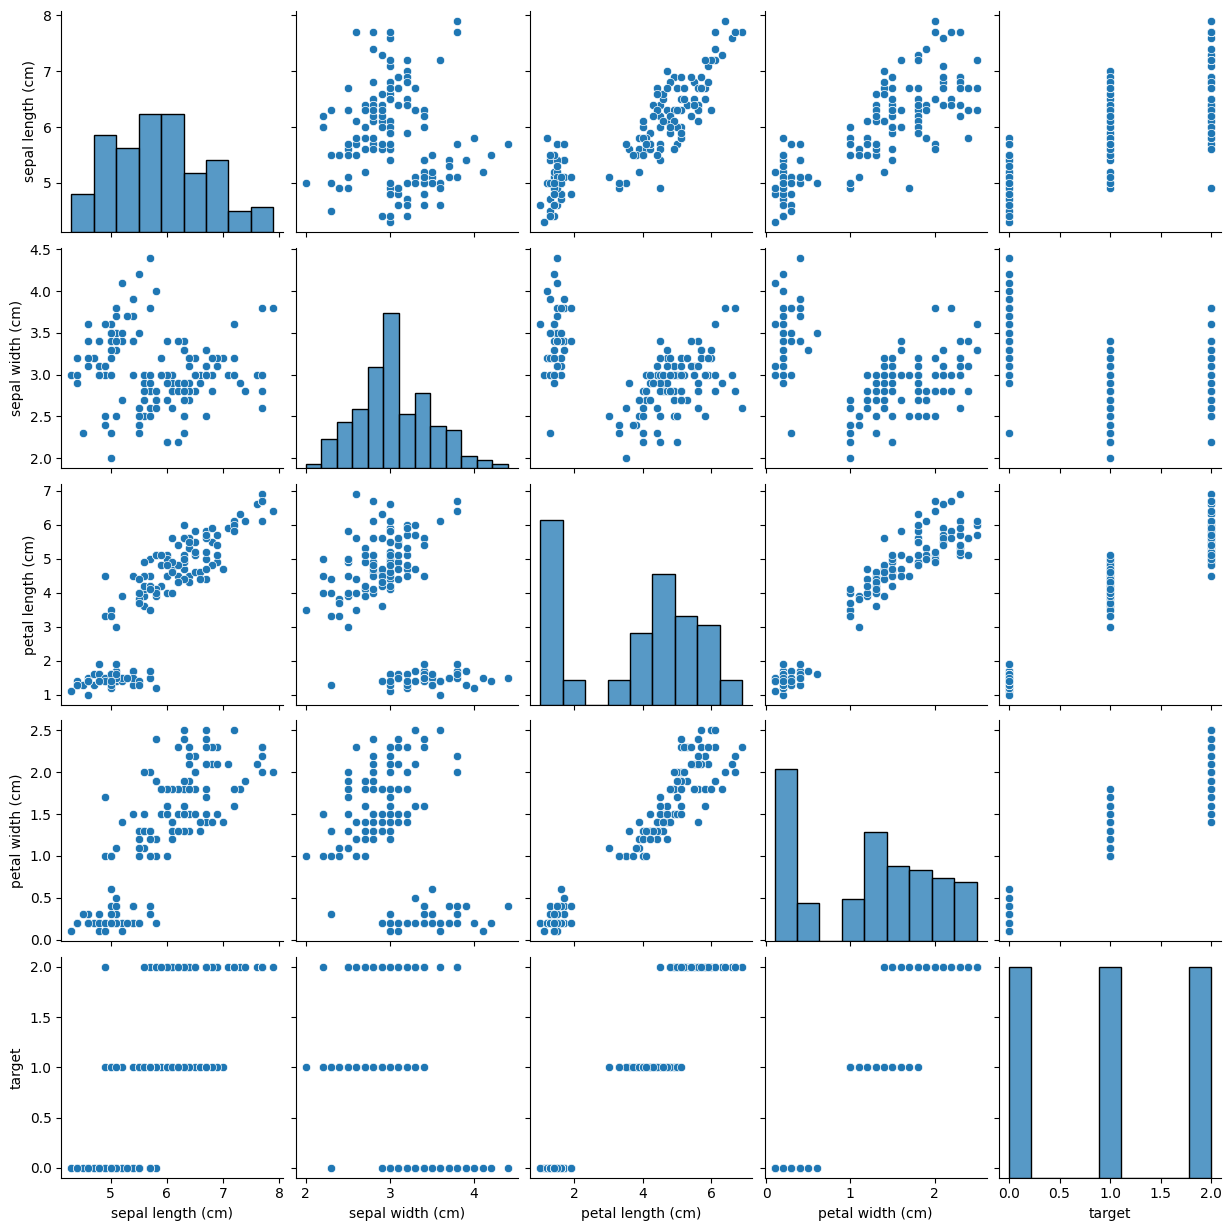

In [42]:
#Visualization
sns.pairplot(dataFrame)#let's display the pairplot for the Dataframe

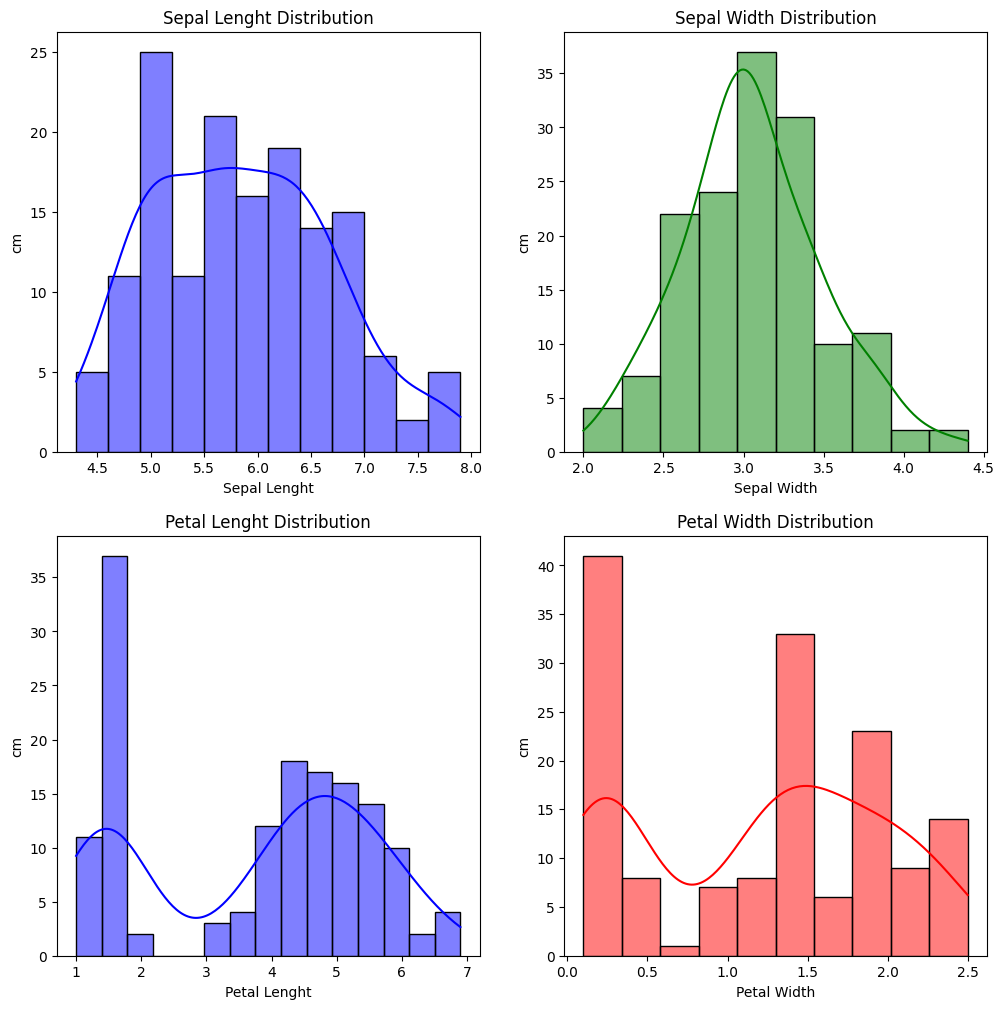

In [43]:
#Let's now make some histogram
fig, ax = plt.subplots(2, 2, figsize=(12, 12))#We create a figure with 2 rows and 2 columns of subplots
sns.histplot(dataFrame['sepal length (cm)'],bins=12, kde=True,color='blue', ax=ax[0,0])#plot first subplot
ax[0,0].set_title('Sepal Lenght Distribution')#set title of subplote 1
ax[0,0].set_xlabel('Sepal Lenght')#set xlabel of subplote 1
ax[0,0].set_ylabel('cm')#set ylabel of subplote 1

sns.histplot(dataFrame['sepal width (cm)'],bins=10, kde=True,color='green', ax=ax[0,1])#plot second subplot
ax[0,1].set_title('Sepal Width Distribution')#set title of subplote 2
ax[0,1].set_xlabel('Sepal Width')#set xlabel of subplote 2
ax[0,1].set_ylabel('cm')#set ylabel of subplote 2

sns.histplot(dataFrame['petal length (cm)'],bins=15, kde=True,color='blue', ax=ax[1,0])#plot third subplot
ax[1,0].set_title('Petal Lenght Distribution')#set title of subplote 3
ax[1,0].set_xlabel('Petal Lenght')#set xlabel of subplote 3
ax[1,0].set_ylabel('cm')#set ylabel of subplote 3

sns.histplot(dataFrame['petal width (cm)'],bins=10, kde=True,color='red', ax=ax[1,1])#plot fourth subplot
ax[1,1].set_title('Petal Width Distribution')#set title of subplote 4
ax[1,1].set_xlabel('Petal Width')#set xlabel of subplote 4
ax[1,1].set_ylabel('cm')#set ylabel of subplote 4

plt.show()

2- Data Preprocessing

In [44]:
#Handling Missing Values
print('Number of missing values for each columns :\n')
print(dataFrame.isnull().sum())#Check if there is missinf values for each column

Number of missing values for each columns :

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [45]:
#We dont have missing value here but we could have handled them like following :

#Removing rows/columns with missing values, but it make us lose data (so we must be careful)
#data_cleaned = dataFrame.dropna()# Remove rows with missing values
#data_cleaned = dataFrame.dropna(axis = 1)# Remove columns with missing values

#Fill missing values

#data_cleaned = dataFrame.fillna(0)#Fill missing value with 0
#data_cleaned = dataFrame.fillna(dataFrame.mean())#Fill missing value with mean value of the column (best choice according to me)


In [46]:
#Feature Scaling
data_scaled = StandardScaler().fit_transform(dataFrame.iloc[:, :-1])#Standardize all our dataFrame EXCEPTED the last row (our target)

In [47]:
#Encoding Categorical Variables
#we dont have categorical variables so we can pass to the next step

4- Model Selection

Here we want to classify our dataset and provide some comparison between the models used

let's see what model we decide to use :

- KNN Classifier, it will implemente the k-nearest neighbors vote for a better classification

- Decision Tree Classifier, it will recursively split the dataset into subgroups based on their feature value, making a tree structure

- Random Forset Classifier, it will build multiple decision trees and combines their prediction for a better accuracy of our classification

- Logistic Regression, a classic choice for classification correlating a linear relationship between the input data and the output data

In [48]:
#the model we will use in a array to make easy use
models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    LogisticRegression(random_state=42, max_iter=1000)
]


5. Training and Evaluation

In [49]:
#Splitting the Dataset
X, y = data_scaled, dataFrame['target'] #split the target and the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)#split test and training set

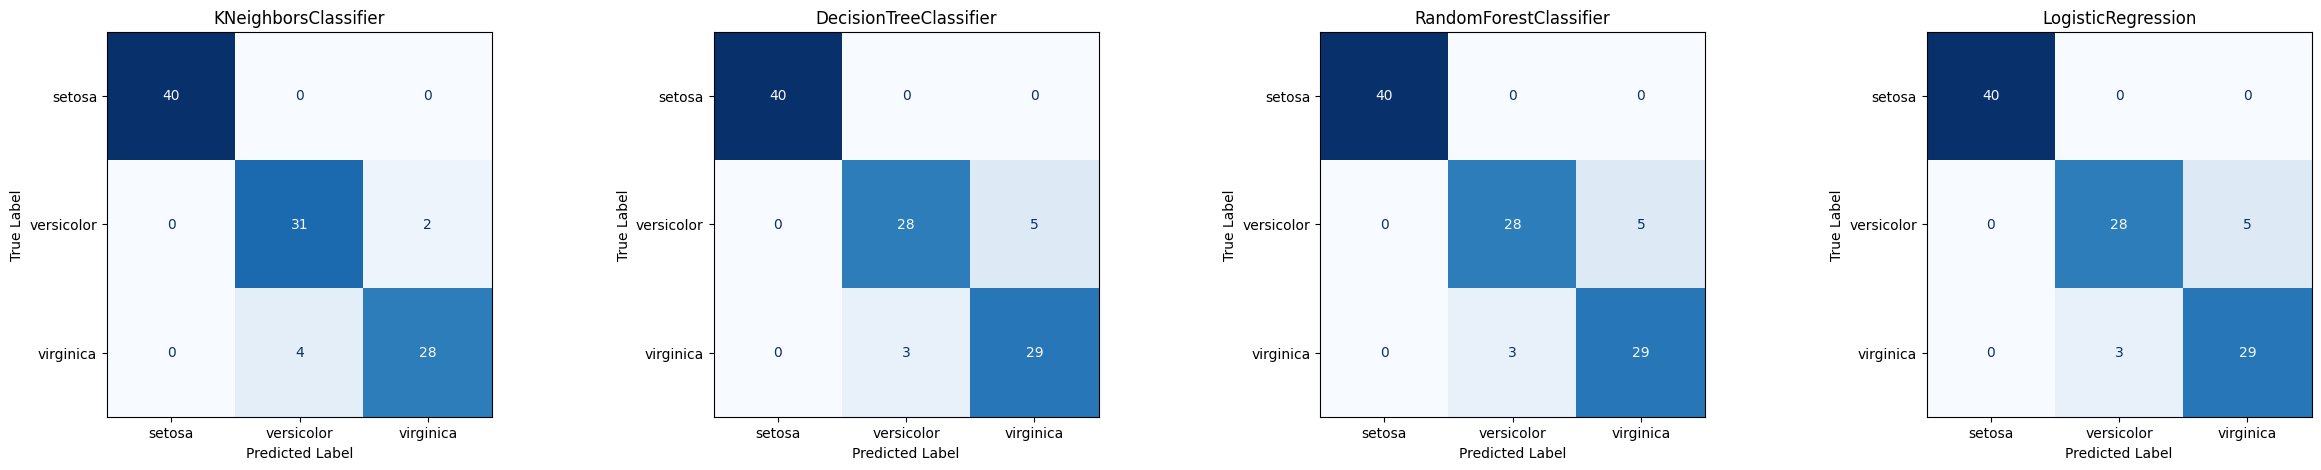

In [50]:
#Training the Model and Evaluation it

#initalize all our evaluation arrays
Accuracy = []
Precision = [] 
Recall = []
F1 = []
Cv_a_m= [] #accuracy mean
Cv_a_v= [] #accuracy variance
Cv_p_m= [] #precision mean
Cv_p_v= [] #precision variance
Cv_r_m= [] #recall mean
Cv_r_v= [] #recall variance
Cv_f_m= [] #f1 mean
Cv_f_v= [] #f1 variance
Cv_ra_m= [] #Roc mean
Cv_ra_v= [] #Roc variance
ROC_AUC = []
ModelsNames = ['KNeighborsClassifier',
        'DecisionTreeClassifier',
        'RandomForestClassifier',
        'LogisticRegression' ]

fig, axes = plt.subplots(1, 4, figsize=(30, 5), clear=True)#We create a figure with 2 rows and 2 columns of subplots
i= 0

#train each model and fill the evaluations arrays
for model in models :
    
    model.fit(X_train, y_train) #We train our model
    predictions = model.predict(X_test) #and test it with the test set

    accuracy = accuracy_score(y_test, predictions) #we evaluate with accuracy metric
    Accuracy.append(accuracy) #store the result in the accuracy array
    
    precision = precision_score(y_test, predictions, average='weighted') #we evaluate with precision metric
    Precision.append(precision) #store the result in the precision array
    
    recall = recall_score(y_test, predictions, average='weighted') #we evaluate with recall metric
    Recall.append(recall) #store the result in the recall array
    
    f1 = f1_score(y_test, predictions, average='weighted') #we evaluate with f1 score metric
    F1.append(f1) #store the result in the f1 score array
    
    probability = model.predict_proba(X_test) #we get the probability of our training set for the Roc Auc metric
    roc = roc_auc_score(y_test, probability, multi_class='ovr') #we evaluate with Roc Auc metric
    ROC_AUC.append(roc) #store the result in the Roc Auc array

    shared_cv = KFold(n_splits=5, shuffle=True, random_state=42)  # we use Cross validation to evaluate
    cv_scores = cross_val_score(model, X, y, cv=shared_cv) #we evaluate our cross validated model with accuracy metric
    Cv_a_m.append(cv_scores.mean()) #store the mean result in the Cross validation accuracy mean array
    Cv_a_v.append(cv_scores.std()) #store the variante result in the Cross validation accuracy variante array

    cv_scores = cross_val_score(model, X, y, cv=shared_cv, scoring='precision_weighted') #we evaluate our cross validated model with precision metric
    Cv_p_m.append(cv_scores.mean()) #store the mean result in the Cross validation precision mean array
    Cv_p_v.append(cv_scores.std()) #store the variante result in the Cross validation precision variante array

    cv_scores = cross_val_score(model, X, y, cv=shared_cv, scoring='recall_weighted') #we evaluate our cross validated model with recall metric
    Cv_r_m.append(cv_scores.mean()) #store the mean result in the Cross validation recall mean array
    Cv_r_v.append(cv_scores.std()) #store the variante result in the Cross validation recall variante array

    cv_scores = cross_val_score(model, X, y, cv=shared_cv, scoring='f1_weighted') #we evaluate our cross validated model with f1 score metric
    Cv_f_m.append(cv_scores.mean()) #store the mean result in the Cross validation recall mean array
    Cv_f_v.append(cv_scores.std()) #store the variante result in the Cross validation f1 score variante array

    cv_scores = cross_val_score(model, X, y, cv=shared_cv, scoring='roc_auc_ovr') #we evaluate our cross validated model with Roc Auc metric
    Cv_ra_m.append(cv_scores.mean()) #store the mean result in the Cross validation Roc Auc mean array
    Cv_ra_v.append(cv_scores.std()) #store the variante result in the Cross validation Roc Auc variante array
    
    #plot ConfusionMatrix
    cm = confusion_matrix(y_test, predictions) # we compute the confusion_matrix for the model
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names) #we create a display of the confusion_matrix
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False) #we plot this display in the position "i" of our subplot
    #we create the title and label for our subplot
    axes[i].set_title(ModelsNames[i])
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")
    i=i+1

    print("\n\n")




In [51]:
#Create a DataFrame with our evaluation data
Models_evaluations = pd.DataFrame ({
    'Model' : ModelsNames,
    'Accuracy' : Accuracy,
    'Precision' : Precision,
    'Recall Score' : Recall,
    'F1 Score' : F1,
    'ROC AUC Score' : ROC_AUC,
})

In [52]:
Models_evaluations

,Model,Accuracy,Precision,Recall Score,F1 Score,ROC AUC Score
0,KNeighborsClassifier,0.942857,0.943764,0.942857,0.942776,0.994623
1,DecisionTreeClassifier,0.923810,0.924767,0.923810,0.923773,0.940763
2,RandomForestClassifier,0.923810,0.924767,0.923810,0.923773,0.994406
3,LogisticRegression,0.923810,0.924767,0.923810,0.923773,0.992785


In [53]:
#Create a DataFrame with our cross validation evaluation data
CV_Models_evaluations = pd.DataFrame ({
    'Model' : ModelsNames,
    'Accuracy mean' : Cv_a_m,
    'Accuracy variance' : Cv_a_v,
    'Precision mean' : Cv_p_m,
    'Precision variance' : Cv_p_v,
    'Recall mean' : Cv_r_m,
    'Recall variance' : Cv_r_v,
    'F1 mean' : Cv_f_m,
    'F1 variance' : Cv_f_v,
    'ROC mean' : Cv_ra_m,
    'ROC variance' : Cv_ra_v,
})

In [54]:
CV_Models_evaluations

,Model,Accuracy mean,Accuracy variance,Precision mean,Precision variance,Recall mean,Recall variance,F1 mean,F1 variance,ROC mean,ROC variance
0,KNeighborsClassifier,0.960000,0.032660,0.962187,0.032551,0.960000,0.032660,0.959797,0.032877,0.996413,0.004109
1,DecisionTreeClassifier,0.953333,0.026667,0.958657,0.023846,0.953333,0.026667,0.953185,0.026656,0.965181,0.018408
2,RandomForestClassifier,0.960000,0.024944,0.963828,0.022798,0.960000,0.024944,0.959902,0.024919,0.994598,0.005648
3,LogisticRegression,0.960000,0.024944,0.963828,0.022798,0.960000,0.024944,0.959902,0.024919,0.998716,0.002568
